In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import modeling
from scipy.optimize import curve_fit
from astropy import wcs
from ROHSApy import ROHSA


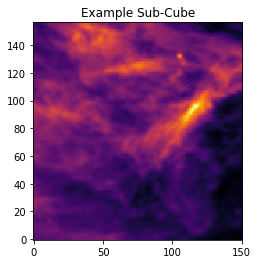

In [15]:
fitsname = "GHIGLS_UMA_Tb.fits"
hdu = fits.open(fitsname)
hdr = hdu[0].header
hdr['CRPIX3'] -= 300 
#cube = hdu[0].data[0]
#LVC IS LOCATED AT 
cube = hdu[0].data[0][300:350, :, :]
#IVC IS LOCATED AT 
#cube = hdu[0].data[0][360:420, :, :]

#The data from the cube was plotted
plt.figure()
plt.imshow(np.sum(cube,0), origin="lower", cmap="inferno")
plt.title('Example Sub-Cube')
plt.show()


def wcs2D(hdr):
    w = wcs.WCS(naxis=2)
    w.wcs.crpix = [hdr['CRPIX1'], hdr['CRPIX2']]
    w.wcs.cdelt = np.array([hdr['CDELT1'], hdr['CDELT2']])
    w.wcs.crval = [hdr['CRVAL1'], hdr['CRVAL2']]
    w.wcs.ctype = [hdr['CTYPE1'], hdr['CTYPE2']]
    return w
w = wcs2D(hdr)


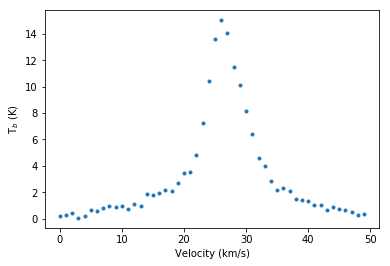

In [16]:
#the spectrum from a single pixel was plotted

# frame = hdu[0].data[0][400,:1,:1]
# dat = hdu[0].data

plt.plot(cube[:,0,0], linestyle = "none", marker = '.')
#plt.title("Power Spectra of Observations")
plt.xlabel("Velocity (km/s)")
plt.ylabel("T$_{b}$ (K)")
plt.show()

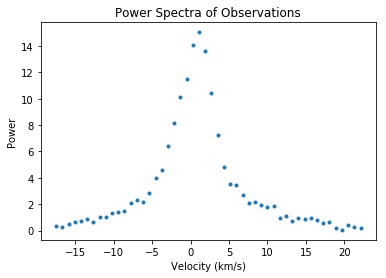

In [17]:
#the velocities were corrected by the information in the fits files, and were centered at zero

CRVAL = hdr['CRVAL3']
CDELT = hdr['CDELT3']
CRPIX = hdr['CRPIX3']

ind_array = np.arange(cube.shape[0])

v = (CRVAL + CDELT*((ind_array) - CRPIX))/1000

plt.plot(v, cube[:,0,0], linestyle = "none", marker = '.')
plt.title("Power Spectra of Observations")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Power")
plt.savefig('powerspec.pdf')
plt.show()



0.8072265299229


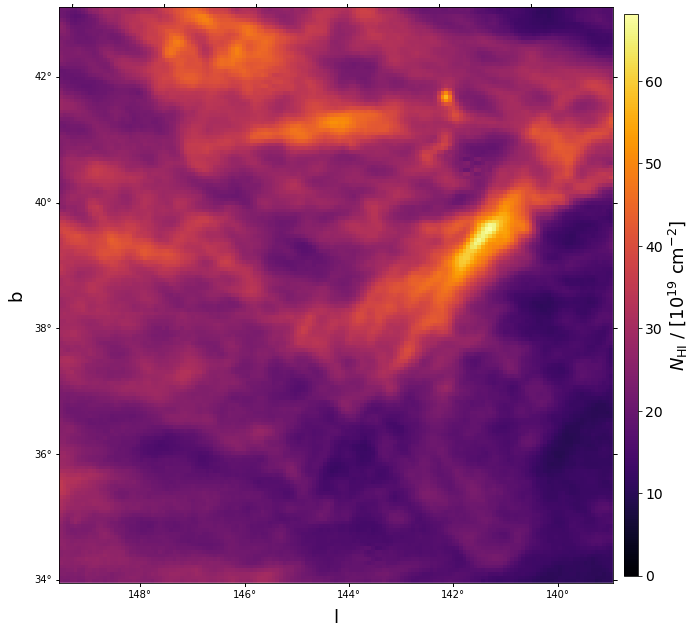

In [18]:
#The column density from equation 2

dv = np.abs(hdr['CDELT3'])/1000
NHI = 1.823e18*dv*np.sum(cube, 0)
print(dv)

def wcs2D(hdr):
    w = wcs.WCS(naxis=2)
    w.wcs.crpix = [hdr['CRPIX1'], hdr['CRPIX2']]
    w.wcs.cdelt = np.array([hdr['CDELT1'], hdr['CDELT2']])
    w.wcs.crval = [hdr['CRVAL1'], hdr['CRVAL2']]
    w.wcs.ctype = [hdr['CTYPE1'], hdr['CTYPE2']]
    return w
w = wcs2D(hdr)

#Plot integrated column density field TOT                                                                                                                                                                                                                                     
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.78,0.8], projection=w)
ax.set_xlabel(r"l", fontsize=18.)
ax.set_ylabel(r"b", fontsize=18.)
cm_inf = plt.get_cmap('inferno')
cm_inf.set_bad(color='white')
cm_inf.set_under(color='black')
imkw_inf = dict(origin='lower', interpolation='none', cmap=cm_inf)
img = ax.imshow(NHI*1.e-19, vmin=0., **imkw_inf)
colorbar_ax = fig.add_axes([0.89, 0.11, 0.02, 0.78])
cbar = fig.colorbar(img, cax=colorbar_ax)
cbar.ax.tick_params(labelsize=14.)
cbar.set_label(r"$N_{\rm HI}$ / [10$^{19}$ cm$^{-2}$]", fontsize=18.)
plt.savefig('NHI_LVC.png', format='png', bbox_inches='tight', pad_inches=0.02)
plt.show()






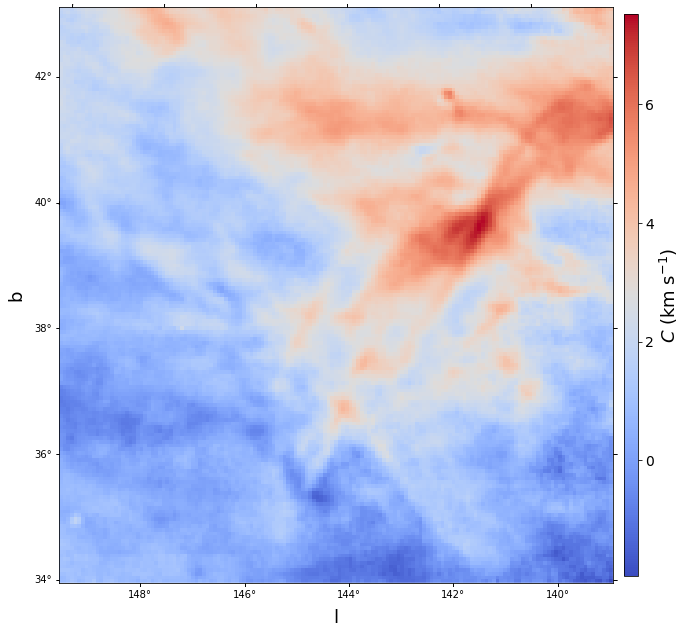

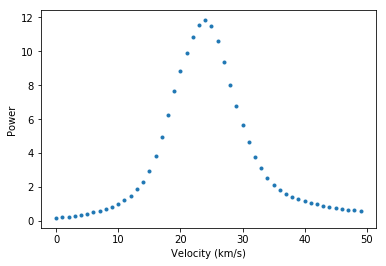

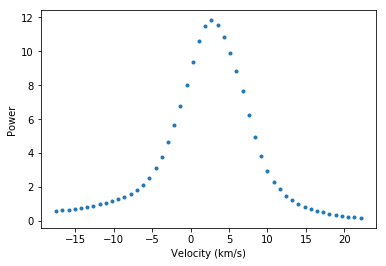

In [19]:
#centroid velocity from equation 4

v_cent = np.tensordot(cube, v, axes = (0,0))/np.sum(cube, 0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.78,0.8], projection=w)
ax.set_xlabel(r"l", fontsize=18.)
ax.set_ylabel(r"b", fontsize=18.)
cm_inf = plt.get_cmap('coolwarm')
cm_inf.set_bad(color='white')
cm_inf.set_under(color='black')
imkw_inf = dict(origin='lower', interpolation='none', cmap = cm_inf)
img = ax.imshow(v_cent, **imkw_inf)
colorbar_ax = fig.add_axes([0.89, 0.11, 0.02, 0.78])
cbar = fig.colorbar(img, cax=colorbar_ax)
cbar.ax.tick_params(labelsize=14.)
cbar.set_label(r"$C$ (km s$^{-1}$)", fontsize=18.)
plt.savefig('v_cent_LVC.png', format='png', bbox_inches='tight', pad_inches=0.02)
plt.show()


#the average spectrum of the pixel at (100, 125) was plotted to show the presence of the galaxies m81 and m82
plt.plot(np.mean(cube, axis = (1,2)), linestyle = "none", marker = '.')
plt.xlabel("Velocity (km/s)")
plt.ylabel("Power")
plt.show() 

#the average spectrum of the pixel at (100, 125) was plotted to show the presence of the galaxies m81 and m82
plt.plot(v, np.mean(cube, axis = (1,2)), linestyle = "none", marker = '.')
plt.xlabel("Velocity (km/s)")
plt.ylabel("Power")
plt.show() 



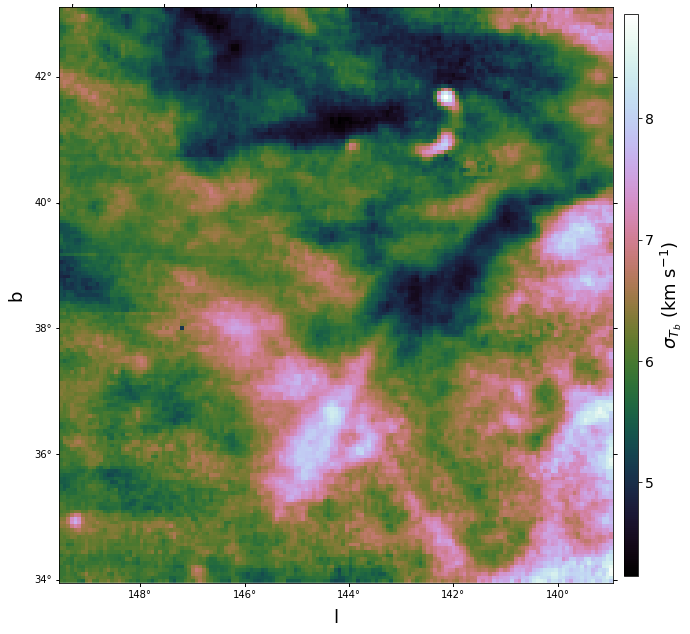

In [20]:
#velocity dispersion from equation 6

sigma = np.sqrt(np.abs(np.tensordot(np.array(v)**2, cube, axes = (0,0))/np.sum(cube, 0)) - v_cent**2)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.78,0.8], projection=w)
ax.set_xlabel(r"l", fontsize=18.)
ax.set_ylabel(r"b", fontsize=18.)
cm_inf = plt.get_cmap('cubehelix')
cm_inf.set_bad(color='white')
cm_inf.set_under(color='black')
imkw_inf = dict(origin='lower', interpolation='none', cmap = cm_inf)
img = ax.imshow(sigma, **imkw_inf)
colorbar_ax = fig.add_axes([0.89, 0.11, 0.02, 0.78])
cbar = fig.colorbar(img, cax=colorbar_ax)
cbar.ax.tick_params(labelsize=14.)
cbar.set_label(r"$\sigma_{T_{b}}$ (km s$^{-1}$)", fontsize=18.)
plt.savefig('sigma_tb_LVC.png', format='png', bbox_inches='tight', pad_inches=0.02)
plt.show()

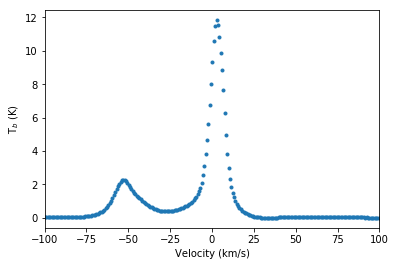

In [8]:
#Same Process but velocity was divided into 2 ranges

#the velocities were plotted over the mean of the spectrum to find where the minimum is between the two main peaks
mean_spec = np.mean(cube, (1,2))

plt.plot(v, mean_spec, linestyle = "none", marker = '.')
plt.xlim(-100, 100)
plt.xlabel("Velocity (km/s)")
plt.ylabel("T$_{b}$ (K)")
plt.savefig("avspec.png")
plt.show() 



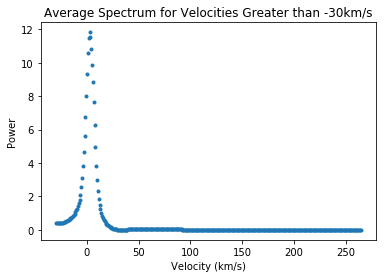

In [9]:
#now that we can see where the minimum in between the two peaks is at roughly -30 km/s,
#we will split the data at -30km/s to get more reasonable results, 

#so the first range will be velocities less than -30 km/s
#we will do this by splitting the array at -30

#first we look for the index where the velocity is less than -30 km/s

v_ind = np.where(v <= -30)

#therefore we can split all of the data sets at the index 365 to get the two distinct velocity ranges

#so for the values greater than -30km/s, the average spectrum is
v_high = v[:365]
mean_spec_high = mean_spec[:365]

plt.plot(v_high, mean_spec_high, linestyle = "none", marker = '.')
plt.title("Average Spectrum for Velocities Greater than -30km/s")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Power")
plt.show() 



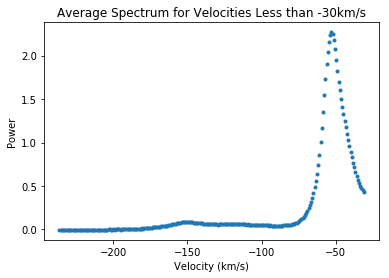

In [10]:
#for the values less than -30 km/s, the average spectrum is

v_low = v[366:]
mean_spec_low = mean_spec[366:]

plt.plot(v_low, mean_spec_low, linestyle = "none", marker = '.')
plt.title("Average Spectrum for Velocities Less than -30km/s")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Power")
plt.show() 

In [23]:
#next we can measure the noise at the end channels. To do this, i will take the mean power over 20 points at each end

noise_low = np.std(mean_spec[580:620])
print("The noise on the left end of the spectrum is ", noise_low)

noise_high = np.std(mean_spec[0:40])
print("The noise on the right end of the spectrum is ", noise_high)


The noise on the left end of the spectrum is  0.00093078805
The noise on the right end of the spectrum is  0.00084874587


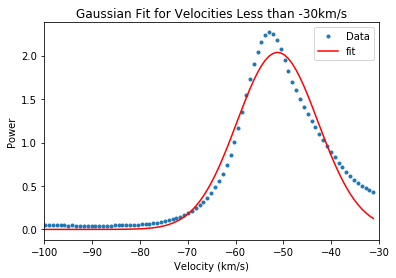

In [32]:
#now we have to fit gaussians to each individual peak in their respective ranges. To do this we will using scipy

#first we will fit the lower velocity structure using a 1D Gaussian

#fitter = modeling.fitting.LevMarLSQFitter()
#model = modeling.models.Gaussian1D()  
#fitted_model = fitter(model, v_low, mean_spec_low)

mean1 = sum(v_low * mean_spec_low) / sum(mean_spec_low)
sigma1 = np.sqrt(sum(mean_spec_low * (v_low - mean1)**2) / sum(mean_spec_low))

def Gauss1(v_low, a, x0, sigma1):
    return a * np.exp(-(v_low - x0)**2 / (2 * sigma1**2))

popt1,pcov1 = curve_fit(Gauss1, v_low, mean_spec_low, p0=[max(mean_spec_low), mean1, sigma1])

plt.plot(v_low, mean_spec_low, linestyle = "none", marker = '.', label = "Data")
plt.plot(v_low, Gauss1(v_low, *popt1), 'r-', label='fit')
plt.title("Gaussian Fit for Velocities Less than -30km/s")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Power")
plt.xlim(-100, -30)
plt.legend()
plt.show() 


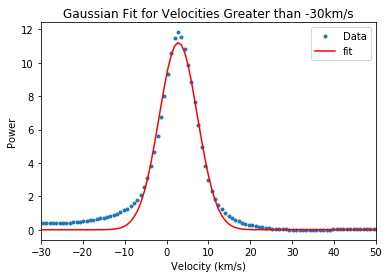

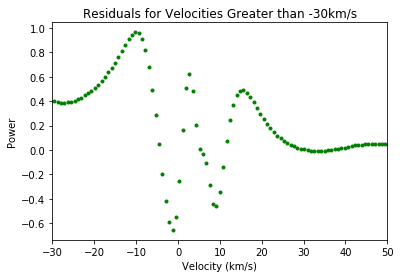

In [41]:
#next we will fit the higher velocity structure using a 1D Gaussian

#fitter = modeling.fitting.LevMarLSQFitter()
#model = modeling.models.Gaussian1D()  
#fitted_model = fitter(model, v_low, mean_spec_low)

mean2 = sum(v_high * mean_spec_high) / sum(mean_spec_high)
sigma2 = np.sqrt(sum(mean_spec_high * (v_high - mean)**2) / sum(mean_spec_high))


def Gauss2(v_high, a, x0, sigma2):
    return a * np.exp(-(v_high - x0)**2 / (2 * sigma2**2))

popt2,pcov2 = curve_fit(Gauss2, v_high, mean_spec_high, p0=[max(mean_spec_high), mean2, sigma2])

plt.plot(v_high, mean_spec_high, linestyle = "none", marker = '.', label = "Data")
plt.plot(v_high, Gauss2(v_high, *popt2), 'r-', label='fit')
plt.title("Gaussian Fit for Velocities Greater than -30km/s")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Power")
plt.xlim(-30, 50)
plt.legend()
plt.show()

#now we can plot the residuals between the fit and the data itself

plt.plot(v_high, mean_spec_high - Gauss2(v_high, *popt2), linestyle = "none", marker = '.', color = 'green', label = "Data")
plt.title("Residuals for Velocities Greater than -30km/s")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Power")
plt.xlim(-30, 50)
plt.show()


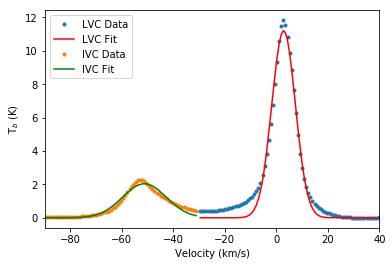

In [38]:
#Here I added both sets of data and their respective fits to the same plot to illustrate how inadequate the fits are

plt.plot(v_high, mean_spec_high, linestyle = "none", marker = '.', label = "LVC Data")
plt.plot(v_high, Gauss2(v_high, *popt2), 'r-', label='LVC Fit')

plt.plot(v_low, mean_spec_low, linestyle = "none", marker = '.', label = "IVC Data")
plt.plot(v_low, Gauss1(v_low, *popt1), 'g-', label='IVC Fit')
#plt.title("Power Spectra with Gaussian Fits for Individual Peaks")
plt.xlabel("Velocity (km/s)")
plt.ylabel("T$_{b}$ (K)")
plt.xlim(-90, 40)
plt.legend()
plt.savefig('gaussianfit.pdf')
plt.show()

In [50]:
#now I will calculate a reduced chi squared value for our fits, which is ideally around 1
#but this will most likely be higher than 1 due to how bad the fit is

from scipy.stats import chisquare

chisquare_low = np.sum((Gauss1(v_low, *popt1) - mean_spec_low)**2 / sigma1**2)
chisquare_high = np.sum((Gauss2(v_high, *popt2) - mean_spec_high)**2 / sigma2**2)

print("The chisquare value for the IVC is: ", chisquare_low)
print("The chisquare value for the LVC is: ", chisquare_high)

sigma_IVC = np.sqrt(sum(Gauss1(v_low, *popt1) * (v_low - mean1)**2) / sum(Gauss1(v_low, *popt1)))
sigma_LVC  = np.sqrt(sum(Gauss2(v_high, *popt2) * (v_high - mean2)**2) / sum(Gauss2(v_high, *popt2)))

fwhm_IVC = 2.35482045 * sigma_IVC
fwhm_LVC = 2.35482045 * sigma_LVC

print("The sigma value for the IVC fit is: ", sigma_IVC)
print("The sigma value for the LVC fit is: ", sigma_LVC)

print("The FWHM value for the IVC fit is: ", fwhm_IVC)
print("The FWHM value for the LVC fit is: ", fwhm_LVC)



The chisquare value for the IVC is:  0.002843681073149555
The chisquare value for the LVC is:  0.08944797809771281
The sigma value for the IVC fit is:  11.307336895641214
The sigma value for the LVC fit is:  4.58006714868545
The FWHM value for the IVC fit is:  26.62674815689545
The FWHM value for the LVC fit is:  10.78523578409769
